In [0]:
d=[]
while(1):
  d.append("1"*10000)

In [0]:
!wget https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip

--2020-02-15 05:03:30--  https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip [following]
--2020-02-15 05:03:31--  https://www.dropbox.com/s/raw/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca38fe2791aea117406a5facc56.dl.dropboxusercontent.com/cd/0/inline/AyI2A6Jy-7l3-kCTE9kG7NxPFcygjp-WtSs8qrS4xO46EcLthV6rCS1f4zFN9qODykMTYN8ZqVP_uNdybxz-86bHlSHcvvxNy70I2i01qwQxZA/file# [following]
--2020-02-15 05:03:31--  https://uca38fe2791aea117406a5facc56.dl.dropboxusercontent.com/cd/0/inline/AyI2A6Jy-7l3-kCTE9kG7NxPFcygjp-WtSs8qrS4xO

In [0]:
!unzip driver.zip

Archive:  driver.zip
  inflating: sample_submission.csv   
  inflating: driver_imgs_list.csv    
  inflating: imgs.zip                


In [0]:
!unzip imgs.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/c7/img_56699.jpg  
  inflating: train/c7/img_56717.jpg  
  inflating: train/c7/img_56724.jpg  
  inflating: train/c7/img_56768.jpg  
  inflating: train/c7/img_56779.jpg  
  inflating: train/c7/img_56849.jpg  
  inflating: train/c7/img_56899.jpg  
  inflating: train/c7/img_56938.jpg  
  inflating: train/c7/img_5706.jpg   
  inflating: train/c7/img_57076.jpg  
  inflating: train/c7/img_57122.jpg  
  inflating: train/c7/img_57137.jpg  
  inflating: train/c7/img_5715.jpg   
  inflating: train/c7/img_57278.jpg  
  inflating: train/c7/img_57321.jpg  
  inflating: train/c7/img_57345.jpg  
  inflating: train/c7/img_57355.jpg  
  inflating: train/c7/img_5741.jpg   
  inflating: train/c7/img_57433.jpg  
  inflating: train/c7/img_5753.jpg   
  inflating: train/c7/img_57559.jpg  
  inflating: train/c7/img_57594.jpg  
  inflating: train/c7/img_5771.jpg   
  inflating: train/c7/img_57712.jpg  
  inflating: train/c7/img_57733.jpg  

In [0]:
import os
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator

In [0]:
data = pd.read_csv('driver_imgs_list.csv')
data.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [0]:
code2activity = {'c0': 'Safe driving', 
                'c1': 'Texting - right', 
                'c2': 'Talking on the phone - right', 
                'c3': 'Texting - left', 
                'c4': 'Talking on the phone - left', 
                'c5': 'Operating the radio', 
                'c6': 'Drinking', 
                'c7': 'Reaching behind', 
                'c8': 'Hair and makeup', 
                'c9': 'Talking to passenger'}

In [0]:
index2code={0:'c0',
            1:'c1',
            2:'c2',
            3:'c3',
            4:'c4',
            5:'c5',
            6:'c6',
            7:'c7',
            8:'c8',
            9:'c9'}

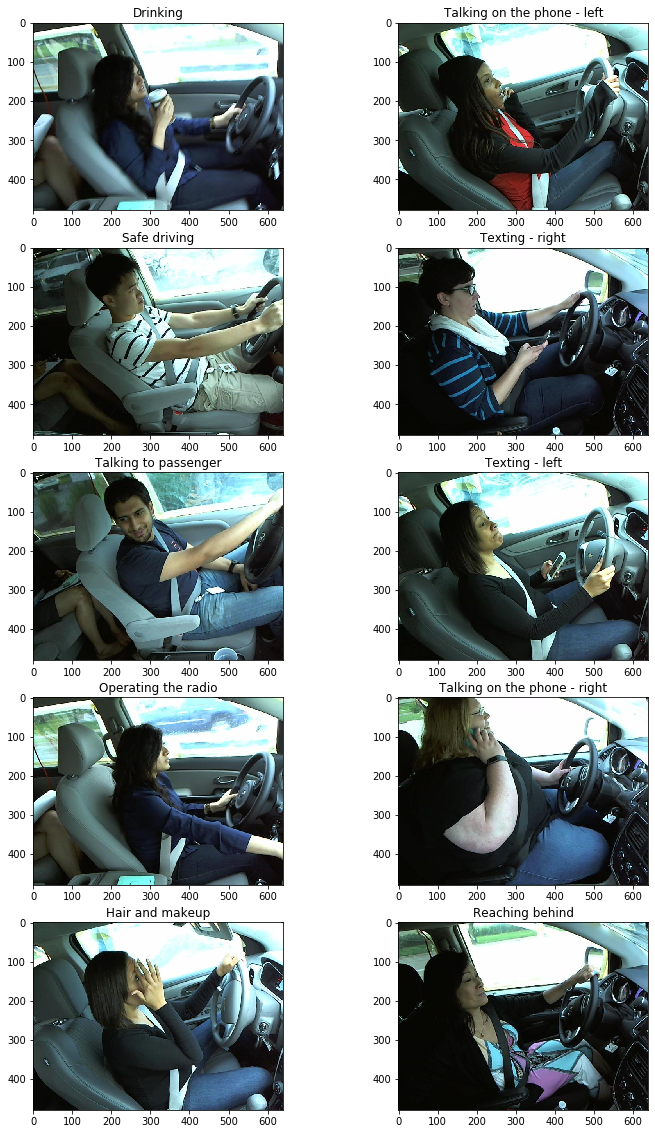

In [0]:
import os
from IPython.display import display, Image
import matplotlib.image as mpimg

plt.figure(figsize = (12, 20))
image_count = 1
root = 'train/'
for directory in os.listdir(root):
    if directory[0] != '.':
        for i, file in enumerate(os.listdir(root + directory)):
            if i == 1:
                break
            else:
                fig = plt.subplot(5, 2, image_count)
                image_count += 1
                image = mpimg.imread(root + directory + '/' + file)
                plt.imshow(image)
                plt.title(code2activity[directory])

In [82]:
model = Sequential()
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', input_shape = (240, 240, 3), data_format = 'channels_last'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(units = 1024, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 10, activation = 'sigmoid'))
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 238, 238, 128)     3584      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 119, 119, 128)     0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 117, 117, 64)      73792     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 58, 58, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 56, 56, 32)        18464     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 28, 28, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 25088)            

In [83]:
train_datagen = ImageDataGenerator(rescale = 1.0/255, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True, 
                                   validation_split = 0.2)

training_set = train_datagen.flow_from_directory('train', 
                                                 target_size = (240, 240), 
                                                 batch_size = 32,
                                                 subset = 'training')

validation_set = train_datagen.flow_from_directory('train', 
                                                   target_size = (240, 240), 
                                                   batch_size = 32,
                                                   subset = 'validation')

Found 17943 images belonging to 10 classes.
Found 4481 images belonging to 10 classes.


In [0]:
type(train_datagen)

keras.preprocessing.image.ImageDataGenerator

In [0]:
type(training_set)

keras_preprocessing.image.directory_iterator.DirectoryIterator

## Structure of the Training Data

### So we have 32 images of size (240,240,3) in one batch

In [49]:
print(training_set[0][0].shape)

(32, 240, 240, 3)


In [50]:
print(training_set[0][1].shape)

(32, 10)


## Checking One sample from the training set

In [51]:
training_set[0][0].shape #Batch of 32 images

(32, 240, 240, 3)

In [52]:
training_set[0][1].shape # #32 one hot encoding array

(32, 10)

In [62]:
training_set[0][0][1].shape ##This is the image

(240, 240, 3)

In [63]:
print(training_set[0][1][1].shape) ##One hot encoding of the corresponding label
print(training_set[0][1][1]) ##This is array of image)

(10,)
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


## Checking Image and Corresponding Label of that image

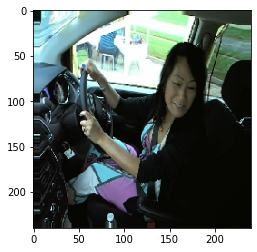

In [65]:
plt.imshow(training_set[0][0][2])

In [67]:
code2activity[index2code[np.argmax(training_set[0][1][2])]]

'Talking to passenger'

## Training the model

In [84]:
model.fit_generator(training_set,
                         steps_per_epoch = 17943/32,
                         epochs = 10,
                         validation_data = validation_set,
                         validation_steps = 4481/32)

Epoch 1/10
561/560 [==============================] - 322s 575ms/step - loss: 2.1403 - acc: 0.1802 - val_loss: 1.5405 - val_acc: 0.4329
Epoch 2/10
561/560 [==============================] - 304s 543ms/step - loss: 1.0227 - acc: 0.6360 - val_loss: 0.4731 - val_acc: 0.8525
Epoch 3/10
561/560 [==============================] - 302s 538ms/step - loss: 0.4337 - acc: 0.8639 - val_loss: 0.2360 - val_acc: 0.9288
Epoch 4/10
561/560 [==============================] - 303s 539ms/step - loss: 0.2604 - acc: 0.9192 - val_loss: 0.1566 - val_acc: 0.9514
Epoch 5/10
561/560 [==============================] - 305s 543ms/step - loss: 0.2025 - acc: 0.9370 - val_loss: 0.1348 - val_acc: 0.9614
Epoch 6/10
561/560 [==============================] - 308s 549ms/step - loss: 0.1699 - acc: 0.9496 - val_loss: 0.1190 - val_acc: 0.9643
Epoch 7/10
561/560 [==============================] - 304s 541ms/step - loss: 0.1368 - acc: 0.9583 - val_loss: 0.1179 - val_acc: 0.9683
Epoch 8/10
561/560 [============================

In [0]:
from keras.models import load_model
model.save("distracted.h5")